In [1]:
"""

Dalam project ini saya menganalisa sales dari Data Ecommerce

Objektif permasalahan dari fokus analisa ini antara lain:
1. Kapan saja akan terjadi lonjakan pembelian dan pada produk apa berdasarkan tahunnya?
2. Customer di kota mana yang melakukan transaksi tertinggi?
3. Menggunakan jenis pembayaran apa customer membayar dan jenis pembayaran mana yang digunakan?

"""
print()

In [4]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

LANGKAH 2 - MENGAKSES DATASET

1. Kapan saja akan terjadi lonjakan pembelian berdasarkan tahunnya?

In [5]:
# Membuat koneksi database

conn = sqlite3.connect('olist.db')

In [6]:
# Menyimpan dataset

order_by_time = pd.read_sql("SELECT * FROM olist_order_items_dataset join olist_order_dataset using(order_id)", conn)
cust_by_city = pd.read_sql("SELECT * FROM olist_order_dataset join olist_order_customer_dataset using(customer_id)", conn)
payment_type = pd.read_sql("SELECT * FROM olist_order_items_dataset join olist_order_payments_dataset using(order_id)", conn)

LANGKAH 3 - EKSPLORASI DAN PEMROSESAN DATA

Identifikasi NaN

In [48]:
"""

Meemasukan seluruh dataset kedalam sebuah list lalu
Mengidentifikasi Missing value dan atau nilai null dari tiap dataset tersebut

"""

lis = [order_by_time, cust_by_city, payment_type]

for i in lis:
    print(i.isnull().sum())

index                               0
order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
index                               0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
dtype: int64
index                               0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
index                               0

In [36]:
"""

Mengurutkan dan mengubah proporsi missing value ke dalam presentas
Hal tersebut dapat mempermudah untuk melihat mana kolom yang memiliki 
missing value paling banyak ke yang paling sedikit

"""


for i in lis:
    print(i.isnull().sum().sort_values(ascending=False)/len(i)*100)

order_delivered_customer_date    2.178429
order_delivered_carrier_date     1.059920
order_approved_at                0.013316
index                            0.000000
order_id                         0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
index                            0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_estimated_delivery_date    0.000000
dtype: float64
order_delivered_customer_date    2.981668
order_delivered_carrier_date     1.793023
order_approved_at                0.160899
index                            0.000000
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_time

Kita dapat melihat bahwa terdapat beberapa missing value di table order_by_time dan cust_by_city, presentase missing value pada table-table tersebut relatif kecil, tidak ada yang lebih dari 3%. Untuk itu saya menghilangkan kolom-kolom tersebut karena nilai missing value tidak lebih dari 5%

In [7]:
#Menghilangkan kolom-kolom yang memiliki missing value di bawah 5%

order_by_time = order_by_time.drop(['order_delivered_customer_date', 
                                    'order_delivered_carrier_date', 
                                    'order_approved_at'], axis=1)

cust_by_city = cust_by_city.drop(['order_delivered_customer_date', 
                                  'order_delivered_carrier_date', 
                                  'order_approved_at'], axis=1)



In [51]:
update_lis = [order_by_time, cust_by_city, payment_type]
for i in update_lis:
    print(i.isnull().sum().sort_values(ascending=False)/len(i)*100)

index                            0.0
order_id                         0.0
order_item_id                    0.0
product_id                       0.0
seller_id                        0.0
shipping_limit_date              0.0
price                            0.0
freight_value                    0.0
index                            0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_estimated_delivery_date    0.0
dtype: float64
index                            0.0
order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_estimated_delivery_date    0.0
index                            0.0
customer_unique_id               0.0
customer_zip_code_prefix         0.0
customer_city                    0.0
customer_state                   0.0
dtype: float64
index                   0.0
order_id                0.0
order_item_id           0.

In [44]:
lis = [order_by_time, cust_by_city, payment_type]
for i in lis:
    print(i.isnull().sum())

order_id                    0
order_item_id               0
price                       0
order_purchase_timestamp    0
dtype: int64
order_id          0
customer_id       0
customer_city     0
customer_state    0
dtype: int64
order_id         0
order_item_id    0
price            0
payment_type     0
payment_value    0
dtype: int64


Identifikasi Outlier

In [9]:
# Melihat persebaran data numerik tiap dataset

for i in lis:
    print(i.describe())

               index  order_item_id          price  freight_value  \
count  112650.000000  112650.000000  112650.000000  112650.000000   
mean    56324.500000       1.197834     120.653739      19.990320   
std     32519.398249       0.705124     183.633928      15.806405   
min         0.000000       1.000000       0.850000       0.000000   
25%     28162.250000       1.000000      39.900000      13.080000   
50%     56324.500000       1.000000      74.990000      16.260000   
75%     84486.750000       1.000000     134.900000      21.150000   
max    112649.000000      21.000000    6735.000000     409.680000   

               index  
count  112650.000000  
mean    49775.306072  
std     28719.629766  
min         0.000000  
25%     24886.250000  
50%     49773.500000  
75%     74648.750000  
max     99440.000000  
              index         index  customer_zip_code_prefix
count  99441.000000  99441.000000              99441.000000
mean   49720.000000  49720.000000              3513

Kita dapat melihat bahwa pada kolom freight_value, price, dan payment_value terjadi perbedaan yang kontras antara antara nilai maksimal dan nilai Q3, untuk itu dapat disimpulkan bahwa pada kolom-kolom tersebut terdapat outlier, karena nilai maksimalnya sangat timpang dengan nilai Q3.

<AxesSubplot:xlabel='freight_value', ylabel='Count'>

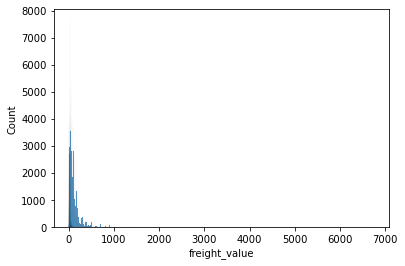

In [21]:
# visualisai kolom freight_value, price, dan payment_value

sns.histplot(data=order_by_time, x="freight_value")

<AxesSubplot:xlabel='price', ylabel='Count'>

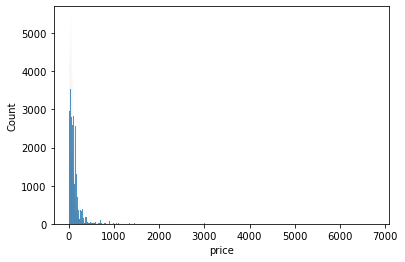

In [26]:
sns.histplot(data=order_by_time, x="price")

<AxesSubplot:xlabel='payment_value', ylabel='Count'>

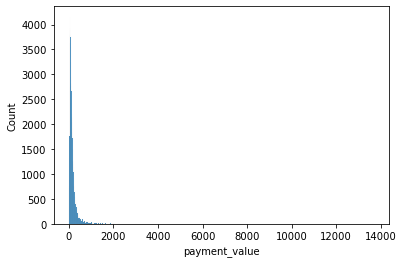

In [24]:
sns.histplot(data=payment_type, x="payment_value")

Dari bar chart dia atas, kita dapat melihat ada beberapa kolom yang memiliki outliers, seperti kolom price dan freight_value pada table order_by_time dan kolom payment_value pada table payment_type

In [62]:
"""
mencari q3 dari kolom price, freight_value, dan payment_value
setelah q3 disimpan ke sebuah variable maka akan dilakukan sortir dimana
melibatkan nilai-nilai yang lebih kecil dari Q3, agar terhindar dari outlier

"""


q3_price = order_by_time["price"].quantile(0.75)
q3_freight_value = order_by_time["freight_value"].quantile(0.75)
q3_payment_value = payment_type["payment_value"].quantile(0.75)

order_by_time = order_by_time[order_by_time["price"] < q3_price*1.5]
order_by_time = order_by_time[order_by_time["freight_value"] < q3_freight_value*1.5]
payment_type = payment_type[payment_type["payment_value"] < q3_payment_value*1.5]

<AxesSubplot:xlabel='price', ylabel='Count'>

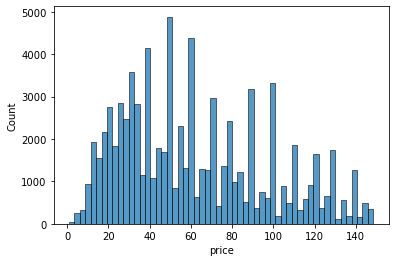

In [59]:
sns.histplot(data=order_by_time, x="price")

<AxesSubplot:xlabel='freight_value', ylabel='Count'>

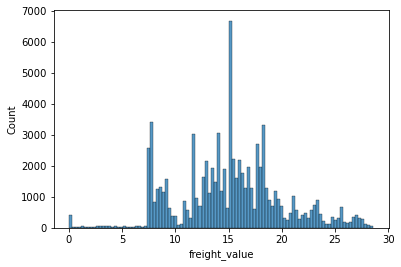

In [60]:
sns.histplot(data=order_by_time, x="freight_value")

<AxesSubplot:xlabel='payment_value', ylabel='Count'>

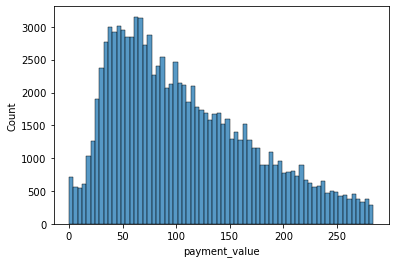

In [63]:
sns.histplot(data=payment_type, x="payment_value")

Kita bisa melihat bahwa persebaran data di atas sudah ideal karena sudah tidak ada outlier-nya

Identifikasi inkonsisten format

In [71]:
#Menghitung jumlah nilai unique dalam kolom order_status

order_by_time['order_status'].value_counts()

delivered      75990
shipped          774
canceled         342
invoiced         222
processing       208
unavailable        4
approved           2
Name: order_status, dtype: int64

In [74]:
cust_by_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          99441 non-null  int64 
 1   order_id                       99441 non-null  object
 2   customer_id                    99441 non-null  object
 3   order_status                   99441 non-null  object
 4   order_purchase_timestamp       99441 non-null  object
 5   order_estimated_delivery_date  99441 non-null  object
 6   index                          99441 non-null  int64 
 7   customer_unique_id             99441 non-null  object
 8   customer_zip_code_prefix       99441 non-null  int64 
 9   customer_city                  99441 non-null  object
 10  customer_state                 99441 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.3+ MB


In [76]:
cust_by_city['customer_city'].value_counts()

sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
andrequice            1
bugre                 1
tavares               1
maiquinique           1
mariano moro          1
Name: customer_city, Length: 4119, dtype: int64

In [77]:
cust_by_city['customer_state'].value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

In [78]:
payment_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102051 entries, 0 to 117600
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 102051 non-null  int64  
 1   order_id              102051 non-null  object 
 2   order_item_id         102051 non-null  int64  
 3   product_id            102051 non-null  object 
 4   seller_id             102051 non-null  object 
 5   shipping_limit_date   102051 non-null  object 
 6   price                 102051 non-null  float64
 7   freight_value         102051 non-null  float64
 8   index                 102051 non-null  int64  
 9   payment_sequential    102051 non-null  int64  
 10  payment_type          102051 non-null  object 
 11  payment_installments  102051 non-null  int64  
 12  payment_value         102051 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 10.9+ MB


In [79]:
payment_type['payment_type'].value_counts()

credit_card    74519
boleto         19857
voucher         6138
debit_card      1537
Name: payment_type, dtype: int64

Dalam kolom-kolom kategorikal di atas bisa kita lihat ada beberapa variasi nilai dan dari nilai-nilai tersebut sudah konsisten, jadi tidak perlu melakukan handling

Identifikasi data duplikat

In [84]:
order_by_time[order_by_time.duplicated(keep=False)].head()
cust_by_city[cust_by_city.duplicated(keep=False)].head()
payment_type[payment_type.duplicated(keep=False)].head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index,payment_sequential,payment_type,payment_installments,payment_value


Dari ketiga dataset tersebut, tidak ada data yang mengalami duplikasi, sehingga tidak memerlukan handling

# Data Manipulation

Date Parsing

In [8]:
"""
Membuat kolom baru dengan mengekstrak tanggal
Menggunakan fitur dari pandas yaitu .to_datetime, dengan fitur tersebut saya dapat mengekstrak hari, tanggal, dan tahun untuk 
keperluan analisis

""" 
order_by_time['order_purchase_timestamp'] = pd.to_datetime(order_by_time['order_purchase_timestamp'])
order_by_time['Day'] = pd.to_datetime(order_by_time['order_purchase_timestamp']).dt.day
order_by_time['Month'] = pd.to_datetime(order_by_time['order_purchase_timestamp']).dt.month
order_by_time['Year'] = pd.to_datetime(order_by_time['order_purchase_timestamp']).dt.year

Grouping

In [9]:
"""
Untuk analisa sales, saya memerlukan total sales setiap bulan dan tahunnya, untuk itu saya membuat kolom baru bernama 'Total'
untuk menyimpan total sales, serta menggunakannya ke dalam plot time series

"""

order_by_time['Total'] = order_by_time['order_item_id']*order_by_time['price']
analisa_1 = pd.DataFrame(order_by_time.groupby(['Year', 'Month'])['Total'].sum())
analisa_1

Total
Year Month            
2016 9          435.23
     10       56103.79
     12          10.90
2017 1       142077.30
     2       269786.66
     3       412016.43
     4       399336.79
     5       562388.09
     6       471648.72
     7       558035.60
     8       655335.69
     9       753890.26
     10      766159.48
     11     1176425.07
     12      815042.73
2018 1      1072699.91
     2       973071.91
     3      1109066.72
     4      1130916.12
     5      1137417.24
     6       975084.01
     7      1011982.19
     8       948662.77
     9          145.00


Tabel di atas menunjukan total sales tiap bulan dan tahun

Pivoting

In [11]:
"""
Untuk mengetahui proporsi metode pembayaran yang digunakan oleh customer, saya juga mengkategorikan dengan total pemnayaran yang 
dikeluarkan berdasarkan tipe pembayaran yang digunakan

"""


payment_type['Total'] = payment_type['order_item_id']*payment_type['price']
analisa_2 = payment_type.pivot_table(values = ["Total"], index='payment_type', aggfunc=[sum])
analisa_2

#.value_counts().sort_values(ascending=False)/len("Total")*100

,sum
,Total
payment_type,
boleto,2.879919e+06
credit_card,1.228084e+07
debit_card,1.994373e+05
voucher,7.169022e+05


Tabel di atas menunjukann total sales yang dilakukan oleh customer berdasarkan metode pembayaran

In [20]:
"""
Untuk mengetahui jumlah order yang dilakukan oleh customer tiap negara, makan yang saya lakukan adalah menggunakan fungsi
pivot_table untuk mengelompokkan setiap jumlah order berdasarkan customer state-nya

"""

analisa_3 = cust_by_city.pivot_table(index='customer_state', values=['order_id'], aggfunc=len)
analisa_3 = analisa_3.sort_values(ascending=False, by='order_id')
sorted_analisa_3 = analisa_3.sort_values(ascending=False, by='order_id').head(10)
sorted_analisa_3

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Tabel di atas menunjukann Top 10 total sales yang dilakukan oleh customer berdasarkan metode pembayaran

## Analisa

<AxesSubplot:xlabel='Month', ylabel='Total'>

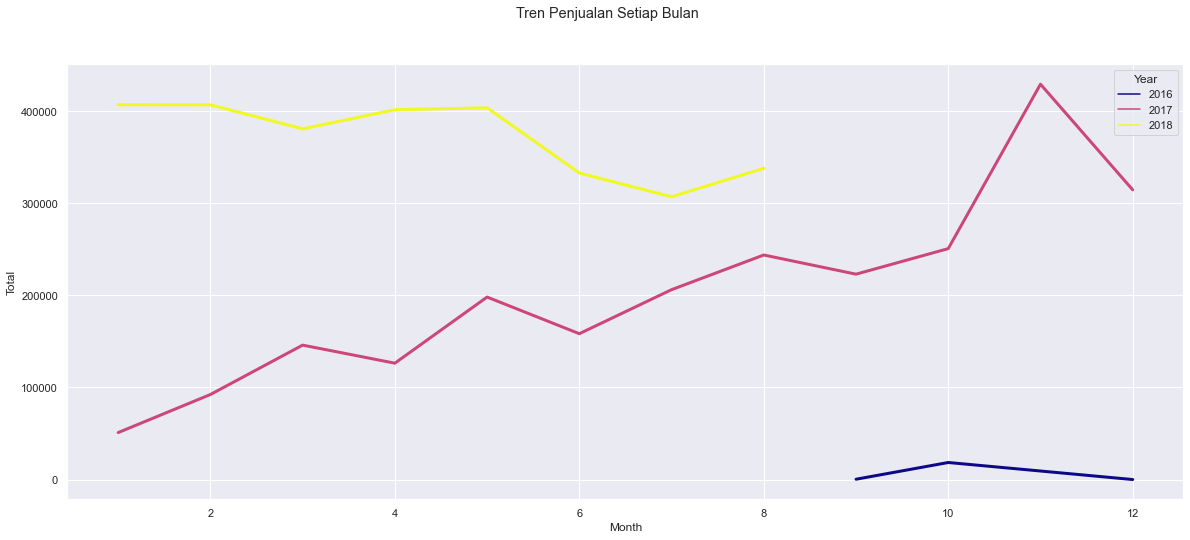

In [95]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,8)})

fig, axes = plt.subplots(1, 1, sharey=False)
fig.suptitle('Tren Penjualan Setiap Bulan')

sns.lineplot(data=analisa_1, x ='Month', y = 'Total',
                hue='Year', palette='plasma',
                legend='full', lw=3)

array([<AxesSubplot:ylabel='(sum, Total)'>], dtype=object)

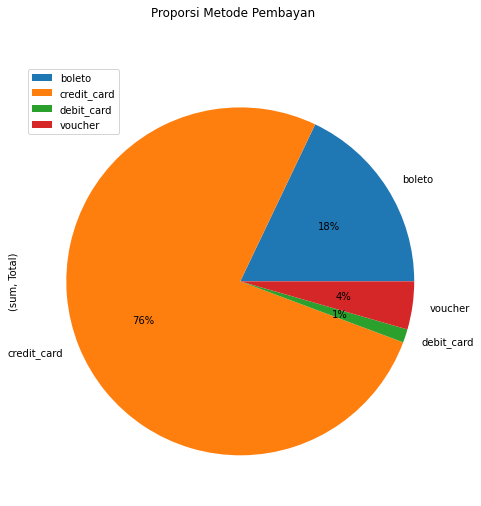

In [15]:
analisa_2.plot(kind='pie', title='Proporsi Metode Pembayan', figsize=[8,8], subplots=True, autopct='%.0f%%')

<AxesSubplot:title={'center':'Jumlah order tiap state'}, xlabel='customer_state'>

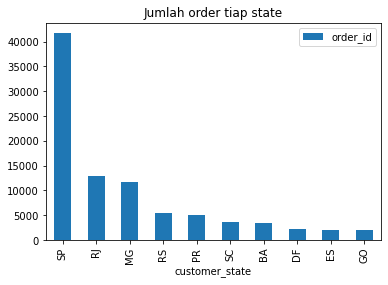

In [22]:
sorted_analisa_3.plot(kind='bar', title='Jumlah order tiap state')

In [39]:
pd.DataFrame(cust_by_city.groupby(['customer_state'])['customer_city'])

,0,1
0,AC,771 rio branco 2183 rio branco 2493 ...
1,AL,625 maceio 712 ...
2,AM,962 humaita 5722 manaus 5877 ma...
3,AP,201 macapa 4907 m...
4,BA,1 barreiras 19 ...
5,CE,36 ibiapina 95 alto santo 30...
6,DF,42 brasilia 61 brasilia 80 b...
7,ES,188 serra 223 ...
8,GO,2 vianopolis 15 ...
9,MA,386 acailandia 544 sao luis ...
